In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
from scipy.io import wavfile
import os

Matplotlib is building the font cache; this may take a moment.


In [2]:
%matplotlib inline

In [3]:
name = 'BWP1_S3a'
#HydroA = wavfile.read('ModulatedChirp_0.05SDutyTime_5.0kHzTo20.0kHz_10DutyCycle_120Cycles.wav')
#HydroB = wavfile.read('ModulatedChirp_0.05SDutyTime_5.0kHzTo20.0kHz_10DutyCycle_120Cycles.wav')
#HydroC = wavfile.read('ModulatedChirp_0.05SDutyTime_5.0kHzTo20.0kHz_10DutyCycle_120Cycles.wav')
#HydroD = wavfile.read('ModulatedChirp_0.05SDutyTime_5.0kHzTo20.0kHz_10DutyCycle_120Cycles.wav')
#HydroE = wavfile.read('ModulatedChirp_0.05SDutyTime_5.0kHzTo20.0kHz_10DutyCycle_120Cycles.wav')
HydroA = wavfile.read('{}_001.wav'.format(name))
HydroB = wavfile.read('{}_002.wav'.format(name))
HydroC = wavfile.read('{}_003.wav'.format(name))
HydroD = wavfile.read('{}_004.wav'.format(name))
HydroE = wavfile.read('{}_005.wav'.format(name))
SampleRate = 48000

In [4]:
len(HydroA[1])

4248787

In [5]:
InputWave = wavfile.read('ModulatedChirp_0.05SDutyTime_5.0kHzTo20.0kHz_10DutyCycle.wav')

In [6]:
Time = np.arange(0,len(HydroA[1])/SampleRate,1/SampleRate)
len(Time)
Time_inputwave = np.arange(0,len(InputWave[1])/SampleRate,1/SampleRate)

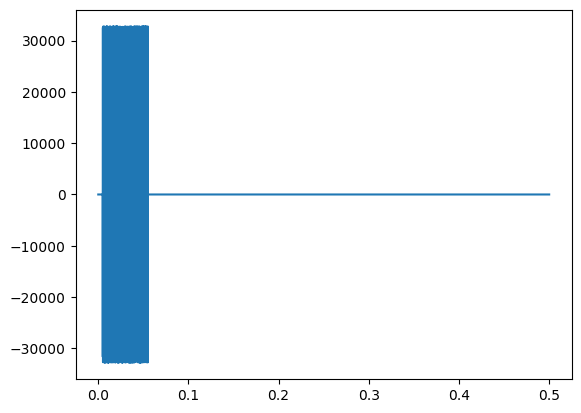

In [7]:
plt.figure()
plt.plot(Time_inputwave,InputWave[1])

10.416666666666666 12.5


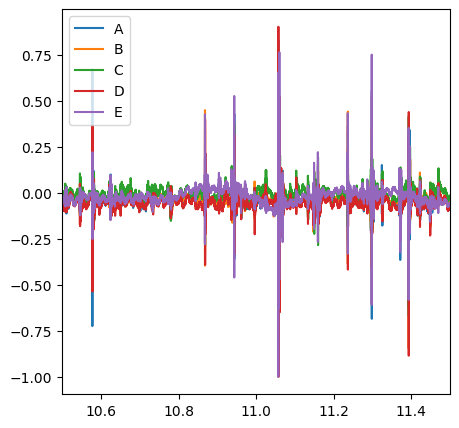

In [8]:
a = 500000
b = 600000
plt.figure(figsize=(5,5))
plt.plot(Time[a:b],HydroA[1][a:b]/np.max(np.abs(HydroA[1][a:b])), label='A')
plt.plot(Time[a:b],HydroB[1][a:b]/np.max(np.abs(HydroB[1][a:b])), label='B')
plt.plot(Time[a:b],HydroC[1][a:b]/np.max(np.abs(HydroC[1][a:b])), label='C')
plt.plot(Time[a:b],HydroD[1][a:b]/np.max(np.abs(HydroD[1][a:b])), label='D')
plt.plot(Time[a:b],HydroE[1][a:b]/np.max(np.abs(HydroE[1][a:b])), label='E')
plt.xlim(10.5,11.5)
plt.legend()
print(Time[a],Time[b])

In [9]:
def bandpass_filter(d, timdo, band, axis=-1, order=2):
    """
    Bandpass filter `d` with the frequency bandwidth `band`
    
    Args:
        d: data
        timdo: the time domain 
        band: the bandwidth as a tuple of (lower frequency, upper frequency)
        axis: on which axis of the data to apply the filter on
        order: order of the butterworth filter
    Returns:
        filtered dataset
    """
    dt = timdo[1] - timdo[0]
    n_nyquist = 0.5 / dt
    low = band[0] / n_nyquist
    high = band[1] / n_nyquist

    b, a = scipy.signal.butter(order, [low, high], btype='band')
    return scipy.signal.filtfilt(b, a, d, axis=axis)  

In [10]:
lowfreq = 3000
highfreq = 23000
HydroA_BP = bandpass_filter(HydroA[1]/np.max(np.abs(HydroA[1])), Time, (lowfreq,highfreq)) 
HydroB_BP = bandpass_filter(HydroB[1]/np.max(np.abs(HydroB[1])), Time, (lowfreq,highfreq)) 
HydroC_BP = bandpass_filter(HydroC[1]/np.max(np.abs(HydroC[1])), Time, (lowfreq,highfreq)) 
HydroD_BP = bandpass_filter(HydroD[1]/np.max(np.abs(HydroD[1])), Time, (lowfreq,highfreq)) 
HydroE_BP = bandpass_filter(HydroE[1]/np.max(np.abs(HydroE[1])), Time, (lowfreq,highfreq)) 

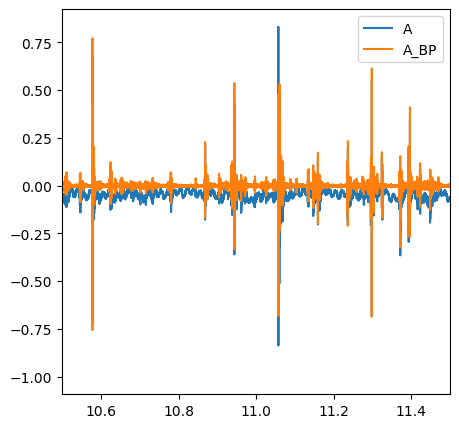

In [11]:
a = 500000
b = 600000
plt.figure(figsize=(5,5))

plt.plot(Time[a:b],HydroA[1][a:b]/np.max(np.abs(HydroA[1][a:b])), label='A')
plt.plot(Time[a:b],HydroA_BP[a:b]/np.max(np.abs(HydroA_BP[a:b])), label='A_BP')
plt.xlim(10.5,11.5)
plt.legend()

In [12]:
#ShortenedA = HydroA[1][a:b]  #Can shorten the processed data if needed simply uncomment here
#ShortenedB = HydroB[1][a:b]
#ShortenedC = HydroC[1][a:b]
#ShortenedD = HydroD[1][a:b]

In [13]:
#MatchedFilterA = np.zeros(len(ShortenedA))  #uncomment these and comment the 4 below out to use shortened data instead
#MatchedFilterB = np.zeros(len(ShortenedB))
# MatchedFilterC = np.zeros(len(ShortenedC))
# MatchedFilterD = np.zeros(len(ShortenedD))

MatchedFilterA = np.zeros(len(HydroA_BP))
MatchedFilterB = np.zeros(len(HydroB_BP))
MatchedFilterC = np.zeros(len(HydroC_BP))
MatchedFilterD = np.zeros(len(HydroD_BP))
MatchedFilterE = np.zeros(len(HydroE_BP))


for i in np.arange(len(MatchedFilterA)): 
    if len(InputWave[1])+i <= len(HydroA_BP):
        MatchedFilterA[i] = np.dot(InputWave[1],HydroA_BP[i:len(InputWave[1])+i])
        MatchedFilterB[i] = np.dot(InputWave[1],HydroB_BP[i:len(InputWave[1])+i])
        MatchedFilterC[i] = np.dot(InputWave[1],HydroC_BP[i:len(InputWave[1])+i])
        MatchedFilterD[i] = np.dot(InputWave[1],HydroD_BP[i:len(InputWave[1])+i])
        MatchedFilterE[i] = np.dot(InputWave[1],HydroE_BP[i:len(InputWave[1])+i])
    
    if len(InputWave[1])+i > len(HydroA_BP):
        MatchedFilterA[i] = np.dot(InputWave[1][0:len(HydroA[1])-len(InputWave[1])-i],HydroA_BP[i:])
        MatchedFilterB[i] = np.dot(InputWave[1][0:len(HydroB[1])-len(InputWave[1])-i],HydroB_BP[i:])
        MatchedFilterC[i] = np.dot(InputWave[1][0:len(HydroC[1])-len(InputWave[1])-i],HydroC_BP[i:])
        MatchedFilterD[i] = np.dot(InputWave[1][0:len(HydroD[1])-len(InputWave[1])-i],HydroD_BP[i:])
        MatchedFilterE[i] = np.dot(InputWave[1][0:len(HydroD[1])-len(InputWave[1])-i],HydroE_BP[i:])

In [14]:
np.save('MatchedA',MatchedFilterA)
np.save('MatchedB',MatchedFilterB)
np.save('MatchedC',MatchedFilterC)
np.save('MatchedD',MatchedFilterD)
np.save('MatchedE',MatchedFilterE)
#MatchedFilterA = np.load('MatchedA.npy')
#MatchedFilterB = np.load('MatchedB.npy')
#MatchedFilterC = np.load('MatchedC.npy')
#MatchedFilterD = np.load('MatchedD.npy')
#MatchedFilterE = np.load('MatchedE.npy')

(10.5, 11.5)

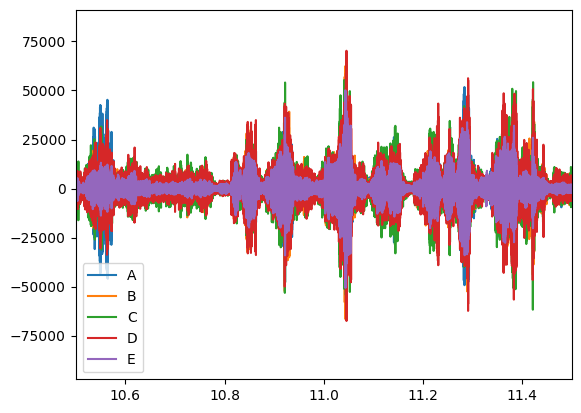

In [15]:
plt.figure()
plt.plot(Time[a:b],MatchedFilterA[a:b],label='A')
plt.plot(Time[a:b],MatchedFilterB[a:b],label='B')
plt.plot(Time[a:b],MatchedFilterC[a:b],label='C')
plt.plot(Time[a:b],MatchedFilterD[a:b],label='D')
plt.plot(Time[a:b],MatchedFilterE[a:b],label='E')
plt.legend()
#plt.ylim(-100,100)
plt.xlim(10.5,11.5)

(10.5, 11.5)

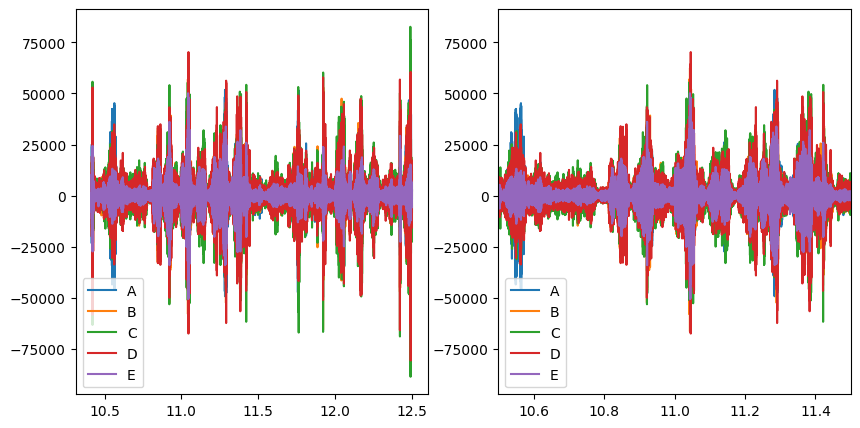

In [16]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(Time[a:b],MatchedFilterA[a:b],label='A')
plt.plot(Time[a:b],MatchedFilterB[a:b],label='B')
plt.plot(Time[a:b],MatchedFilterC[a:b],label='C')
plt.plot(Time[a:b],MatchedFilterD[a:b],label='D')
plt.plot(Time[a:b],MatchedFilterE[a:b],label='E')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Time[a:b],MatchedFilterA[a:b],label='A')
plt.plot(Time[a:b],MatchedFilterB[a:b],label='B')
plt.plot(Time[a:b],MatchedFilterC[a:b],label='C')
plt.plot(Time[a:b],MatchedFilterD[a:b],label='D')
plt.plot(Time[a:b],MatchedFilterE[a:b],label='E')
plt.legend()
#plt.ylim(-10000,10000)
plt.xlim(10.5,11.5)

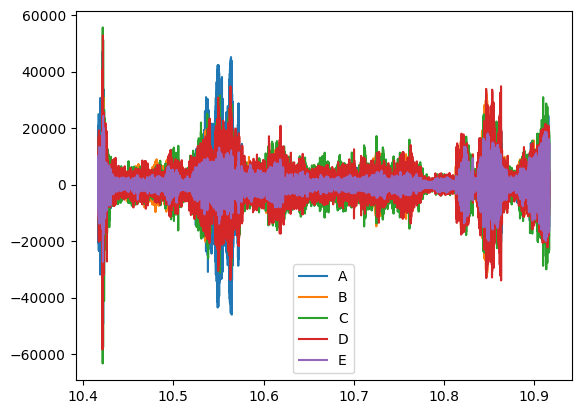

In [17]:
IndividualSliceA = MatchedFilterA[a:a+len(InputWave[1])]
IndividualSliceB = MatchedFilterB[a:a+len(InputWave[1])]
IndividualSliceC = MatchedFilterC[a:a+len(InputWave[1])]
IndividualSliceD = MatchedFilterD[a:a+len(InputWave[1])]
IndividualSliceE = MatchedFilterE[a:a+len(InputWave[1])]

plt.figure()
plt.plot(Time[a:a+len(InputWave[1])],IndividualSliceA, label='A')
plt.plot(Time[a:a+len(InputWave[1])],IndividualSliceB, label='B')
plt.plot(Time[a:a+len(InputWave[1])],IndividualSliceC, label='C')
plt.plot(Time[a:a+len(InputWave[1])],IndividualSliceD, label='D')
plt.plot(Time[a:a+len(InputWave[1])],IndividualSliceE, label='E')
plt.legend()
#plt.xlim(10.4255,10.427)

In [18]:
Cycles = 125
IndividualSlicesA = np.zeros((Cycles,len(InputWave[1])))
IndividualSlicesB = np.zeros((Cycles,len(InputWave[1])))
IndividualSlicesC = np.zeros((Cycles,len(InputWave[1])))
IndividualSlicesD = np.zeros((Cycles,len(InputWave[1])))
IndividualSlicesE = np.zeros((Cycles,len(InputWave[1])))

for i in np.arange(Cycles):
    offset = int(1/8*i)
    IndividualSlicesA[i] = MatchedFilterA[offset+i*(len(InputWave[1])):offset+(1+i)*(len(InputWave[1]))]
    IndividualSlicesB[i] = MatchedFilterB[offset+i*(len(InputWave[1])):offset+(1+i)*(len(InputWave[1]))]
    IndividualSlicesC[i] = MatchedFilterC[offset+i*(len(InputWave[1])):offset+(1+i)*(len(InputWave[1]))]
    IndividualSlicesD[i] = MatchedFilterD[offset+i*(len(InputWave[1])):offset+(1+i)*(len(InputWave[1]))]
    IndividualSlicesE[i] = MatchedFilterE[offset+i*(len(InputWave[1])):offset+(1+i)*(len(InputWave[1]))]
    
    

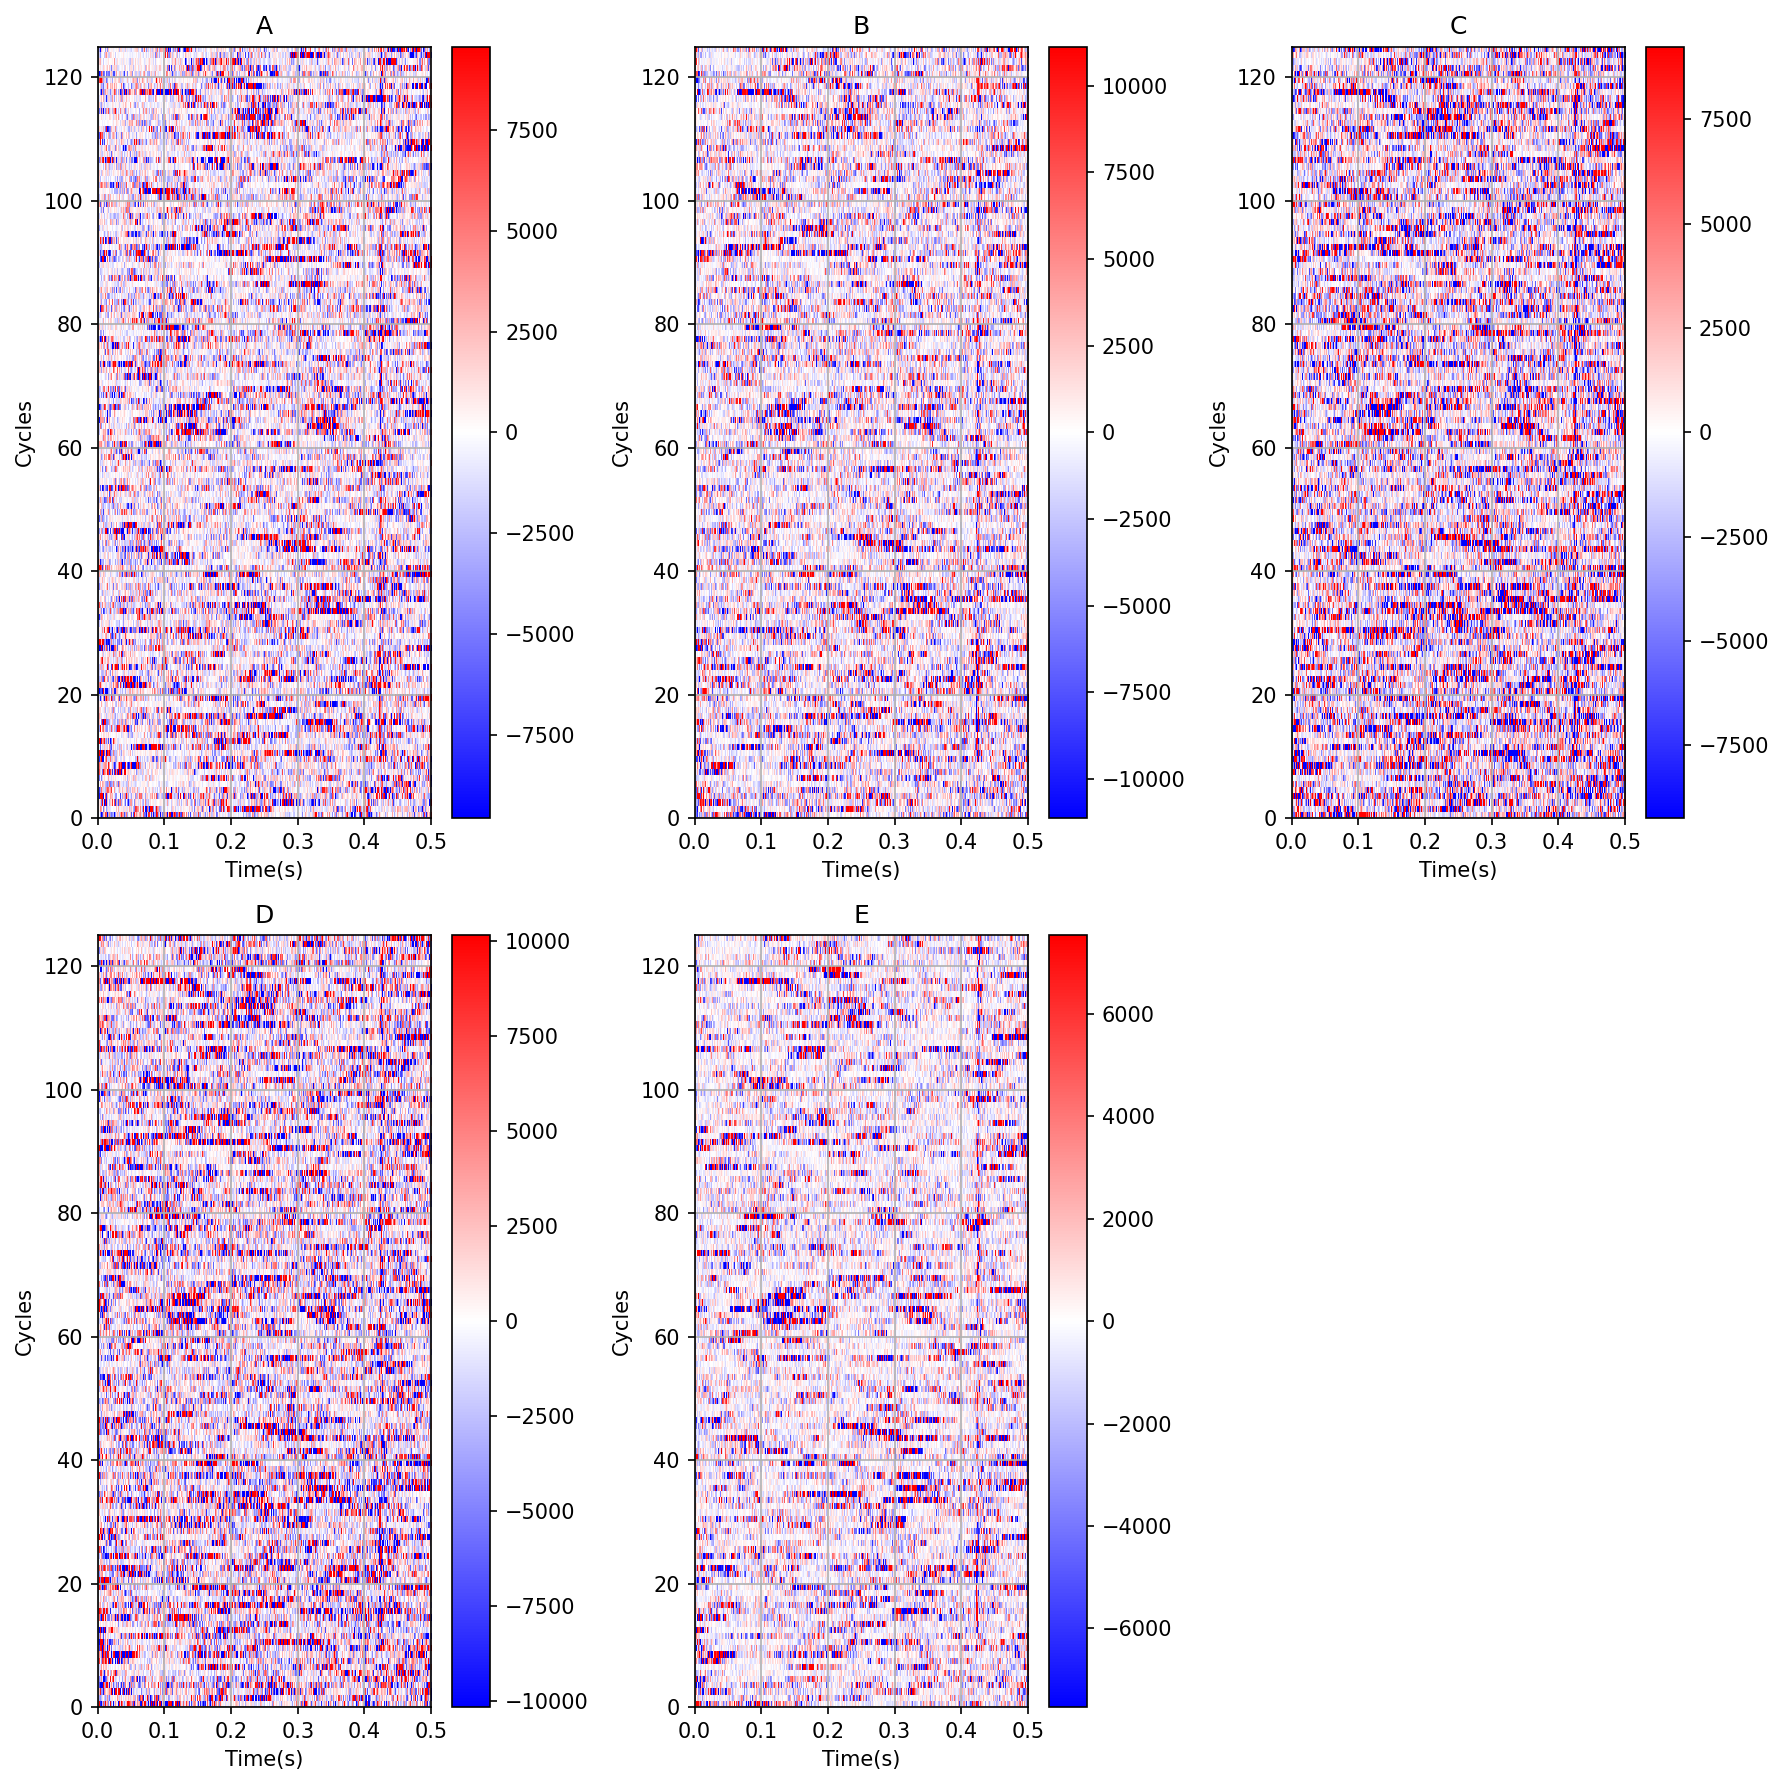

In [19]:
plt.figure(figsize=(12,12),dpi=150)
xmin = 0.00
xmax = 0.5
grid = True
scaling = 20


plt.subplot(2,3,1)
extent = (Time_inputwave[0], Time_inputwave[-1], 0, len(IndividualSlicesA))
plt.imshow(IndividualSlicesA, extent=extent, aspect='auto',vmin=-np.max(IndividualSlicesA)/scaling,vmax=np.max(IndividualSlicesA)/scaling,cmap='bwr',origin = 'lower',interpolation='none')
plt.colorbar()
plt.xlim(xmin,xmax)
if grid:
    plt.grid()
plt.title('A')
plt.tight_layout()
plt.xlabel('Time(s)')
plt.ylabel('Cycles')

plt.subplot(2,3,2)
extent = (Time_inputwave[0], Time_inputwave[-1], 0, len(IndividualSlicesB))
plt.imshow(IndividualSlicesB, extent=extent, aspect='auto',vmin=-np.max(IndividualSlicesB)/scaling,vmax=np.max(IndividualSlicesB)/scaling,cmap='bwr',origin = 'lower',interpolation='none')
plt.colorbar()
plt.xlim(xmin,xmax)
if grid:
    plt.grid()
plt.title('B') 
plt.tight_layout()
plt.xlabel('Time(s)')
plt.ylabel('Cycles')


plt.subplot(2,3,3)
extent = (Time_inputwave[0], Time_inputwave[-1], 0, len(IndividualSlicesC))
plt.imshow(IndividualSlicesC, extent=extent, aspect='auto',vmin=-np.max(IndividualSlicesC)/scaling,vmax=np.max(IndividualSlicesC)/scaling,cmap='bwr',origin = 'lower',interpolation='none')
plt.colorbar()
plt.xlim(xmin,xmax)
if grid:
    plt.grid()
plt.title('C')
plt.tight_layout()
plt.xlabel('Time(s)')
plt.ylabel('Cycles')



plt.subplot(2,3,4)
extent = (Time_inputwave[0], Time_inputwave[-1], 0, len(IndividualSlicesD))
plt.imshow(IndividualSlicesD, extent=extent, aspect='auto',vmin=-np.max(IndividualSlicesD)/scaling,vmax=np.max(IndividualSlicesD)/scaling,cmap='bwr',origin = 'lower',interpolation='none')
plt.colorbar()
plt.xlim(xmin,xmax)
if grid:
    plt.grid()
plt.title('D')
plt.tight_layout()
plt.xlabel('Time(s)')
plt.ylabel('Cycles')



plt.subplot(2,3,5)
extent = (Time_inputwave[0], Time_inputwave[-1], 0, len(IndividualSlicesE))
plt.imshow(IndividualSlicesE, extent=extent, aspect='auto',vmin=-np.max(IndividualSlicesE)/scaling,vmax=np.max(IndividualSlicesE)/scaling,cmap='bwr',origin = 'lower',interpolation='none')
plt.colorbar()
plt.xlim(xmin,xmax)
if grid:
    plt.grid()
plt.title('E')
plt.tight_layout()
plt.xlabel('Time(s)')
plt.ylabel('Cycles')


plt.savefig('{}_IRF'.format(name),dpi=150)

In [21]:
DelayValuesLow = -100
DelayValuesHigh = 100
DelayAndSumDA = np.zeros((len(IndividualSlicesA),DelayValuesHigh-DelayValuesLow))
DelayAndSumDB = np.zeros((len(IndividualSlicesA),len(DelayAndSumDA[0])))
DelayAndSumDC = np.zeros((len(IndividualSlicesA),len(DelayAndSumDA[0])))
DelayAndSumDE = np.zeros((len(IndividualSlicesA),len(DelayAndSumDA[0])))

DelayAndSumAB = np.zeros((len(IndividualSlicesA),DelayValuesHigh-DelayValuesLow))
DelayAndSumAC = np.zeros((len(IndividualSlicesA),len(DelayAndSumDA[0])))
DelayAndSumAD = np.zeros((len(IndividualSlicesA),len(DelayAndSumDA[0])))
DelayAndSumAE = np.zeros((len(IndividualSlicesA),len(DelayAndSumDA[0])))

for j in np.arange(len(IndividualSlicesA)):
    for i in np.arange(-100,100):
        if i<0:
            
            DelayAndSumDA[j,i+100] = np.dot(np.append(np.zeros(-i),IndividualSlicesA[j]),np.append(IndividualSlicesD[j],np.zeros(-i)))
            DelayAndSumDB[j,i+100] = np.dot(np.append(np.zeros(-i),IndividualSlicesB[j]),np.append(IndividualSlicesD[j],np.zeros(-i)))
            DelayAndSumDC[j,i+100] = np.dot(np.append(np.zeros(-i),IndividualSlicesC[j]),np.append(IndividualSlicesD[j],np.zeros(-i)))
            DelayAndSumDE[j,i+100] = np.dot(np.append(np.zeros(-i),IndividualSlicesE[j]),np.append(IndividualSlicesD[j],np.zeros(-i)))
            
            DelayAndSumAB[j,i+100] = np.dot(np.append(np.zeros(-i),IndividualSlicesB[j]),np.append(IndividualSlicesA[j],np.zeros(-i)))
            DelayAndSumAC[j,i+100] = np.dot(np.append(np.zeros(-i),IndividualSlicesC[j]),np.append(IndividualSlicesA[j],np.zeros(-i)))
            DelayAndSumAD[j,i+100] = np.dot(np.append(np.zeros(-i),IndividualSlicesD[j]),np.append(IndividualSlicesA[j],np.zeros(-i)))
            DelayAndSumAE[j,i+100] = np.dot(np.append(np.zeros(-i),IndividualSlicesE[j]),np.append(IndividualSlicesA[j],np.zeros(-i)))
            
        if i==0:
            
            DelayAndSumDA[j,i+100] = np.dot(IndividualSlicesA[j],IndividualSlicesD[j])
            DelayAndSumDB[j,i+100] = np.dot(IndividualSlicesB[j],IndividualSlicesD[j])
            DelayAndSumDC[j,i+100] = np.dot(IndividualSlicesC[j],IndividualSlicesD[j])
            DelayAndSumDE[j,i+100] = np.dot(IndividualSlicesE[j],IndividualSlicesD[j])
            
            DelayAndSumAB[j,i+100] = np.dot(IndividualSlicesB[j],IndividualSlicesA[j])
            DelayAndSumAC[j,i+100] = np.dot(IndividualSlicesC[j],IndividualSlicesA[j])
            DelayAndSumAD[j,i+100] = np.dot(IndividualSlicesD[j],IndividualSlicesA[j])
            DelayAndSumAE[j,i+100] = np.dot(IndividualSlicesE[j],IndividualSlicesA[j])
            
        
        if i>0:
            
            DelayAndSumDA[j,i+100] = np.dot(np.append(IndividualSlicesA[j],np.zeros(i)),np.append(np.zeros(i),IndividualSlicesD[j]))
            DelayAndSumDB[j,i+100] = np.dot(np.append(IndividualSlicesB[j],np.zeros(i)),np.append(np.zeros(i),IndividualSlicesD[j]))
            DelayAndSumDC[j,i+100] = np.dot(np.append(IndividualSlicesC[j],np.zeros(i)),np.append(np.zeros(i),IndividualSlicesD[j]))
            DelayAndSumDE[j,i+100] = np.dot(np.append(IndividualSlicesE[j],np.zeros(i)),np.append(np.zeros(i),IndividualSlicesD[j]))
            
            DelayAndSumAB[j,i+100] = np.dot(np.append(IndividualSlicesB[j],np.zeros(i)),np.append(np.zeros(i),IndividualSlicesA[j]))
            DelayAndSumAC[j,i+100] = np.dot(np.append(IndividualSlicesC[j],np.zeros(i)),np.append(np.zeros(i),IndividualSlicesA[j]))
            DelayAndSumAD[j,i+100] = np.dot(np.append(IndividualSlicesD[j],np.zeros(i)),np.append(np.zeros(i),IndividualSlicesA[j]))
            DelayAndSumAE[j,i+100] = np.dot(np.append(IndividualSlicesE[j],np.zeros(i)),np.append(np.zeros(i),IndividualSlicesA[j]))
            
        

In [22]:

DAS_DA_Index = np.zeros(len(DelayAndSumDA))
DAS_DB_Index = np.zeros(len(DelayAndSumDA))
DAS_DC_Index = np.zeros(len(DelayAndSumDA))
DAS_DE_Index = np.zeros(len(DelayAndSumDA))


DAS_AB_Index = np.zeros(len(DelayAndSumDA))
DAS_AC_Index = np.zeros(len(DelayAndSumDA))
DAS_AD_Index = np.zeros(len(DelayAndSumDA))
DAS_AE_Index = np.zeros(len(DelayAndSumDA))


for i in np.arange(len(DelayAndSumAB)): #VICTORIA CHANGED DA TO AB
    DAS_DA_Index[i] = np.argmax(DelayAndSumDA[i])+DelayValuesLow
    DAS_DB_Index[i] = np.argmax(DelayAndSumDB[i])+DelayValuesLow
    DAS_DC_Index[i] = np.argmax(DelayAndSumDC[i])+DelayValuesLow
    DAS_DE_Index[i] = np.argmax(DelayAndSumDE[i])+DelayValuesLow
    
    DAS_AB_Index[i] = np.argmax(DelayAndSumAB[i])+DelayValuesLow
    DAS_AC_Index[i] = np.argmax(DelayAndSumAC[i])+DelayValuesLow
    DAS_AD_Index[i] = np.argmax(DelayAndSumAD[i])+DelayValuesLow
    DAS_AE_Index[i] = np.argmax(DelayAndSumAE[i])+DelayValuesLow

In [26]:
'''
plt.figure()
plt.plot(IndividualSlicesD[50])
plt.plot(np.roll(IndividualSlicesA[50],-DAS_DA_Index[50]))
plt.plot(np.roll(IndividualSlicesB[50],-DAS_DB_Index[50]))
plt.plot(np.roll(IndividualSlicesC[50],-DAS_DC_Index[50]))
plt.plot(np.roll(IndividualSlicesE[50],-DAS_DE_Index[50]))
'''

'\nplt.figure()\nplt.plot(IndividualSlicesD[50])\nplt.plot(np.roll(IndividualSlicesA[50],-DAS_DA_Index[50]))\nplt.plot(np.roll(IndividualSlicesB[50],-DAS_DB_Index[50]))\nplt.plot(np.roll(IndividualSlicesC[50],-DAS_DC_Index[50]))\nplt.plot(np.roll(IndividualSlicesE[50],-DAS_DE_Index[50]))\n'

In [27]:
DTOA_DA = DAS_DA_Index/SampleRate
DTOA_DB = DAS_DB_Index/SampleRate
DTOA_DC = DAS_DC_Index/SampleRate
DTOA_DE = DAS_DE_Index/SampleRate

DTOA_AB = DAS_AB_Index/SampleRate
DTOA_AC = DAS_AC_Index/SampleRate
DTOA_AD = DAS_AD_Index/SampleRate
DTOA_AE = DAS_AE_Index/SampleRate

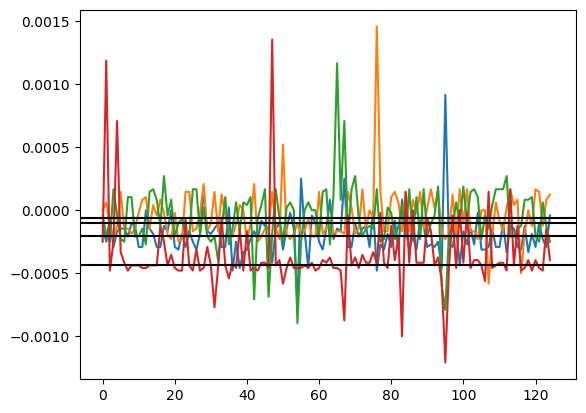

In [28]:
plt.figure()
plt.plot(DTOA_DA)
plt.plot(DTOA_DB)
plt.plot(DTOA_DC)
plt.plot(DTOA_DE)
plt.axline(xy1=(0,np.median(DTOA_DA[10:110])),xy2=(len(DTOA_DA),np.median(DTOA_DA[10:110])),color='k')
plt.axline(xy1=(0,np.median(DTOA_DB[10:110])),xy2=(len(DTOA_DA),np.median(DTOA_DB[10:110])),color='k')
plt.axline(xy1=(0,np.median(DTOA_DC[10:110])),xy2=(len(DTOA_DA),np.median(DTOA_DC[10:110])),color='k')
plt.axline(xy1=(0,np.median(DTOA_DE[10:110])),xy2=(len(DTOA_DA),np.median(DTOA_DE[10:110])),color='k')

In [29]:
print('Delayed Time of Arrival DA = {:.02} Seconds'.format(np.median(DTOA_DA[10:110])), 'Delayed Time of Arrival DB = {:.02} Seconds'.format(np.median(DTOA_DB[10:110])))
print('Delayed Time of Arrival DC = {:.02} Seconds'.format(np.median(DTOA_DC[10:110])),'Delayed Time of Arrival DE = {:.02} Seconds'.format(np.median(DTOA_DE[10:110])))

Delayed Time of Arrival DA = -0.00021 Seconds Delayed Time of Arrival DB = -0.0001 Seconds
Delayed Time of Arrival DC = -6.3e-05 Seconds Delayed Time of Arrival DE = -0.00044 Seconds


In [30]:
DTOA_ReferencedToA = [0,np.median(DTOA_AB[10:110]),np.median(DTOA_AC[10:110]),np.median(DTOA_AD[10:110]),np.median(DTOA_AE[10:110])]
DTOA_ReferencedToD = [np.median(DTOA_DA[10:110]),np.median(DTOA_DB[10:110]),np.median(DTOA_DC[10:110]),0,np.median(DTOA_DE[10:110])]

In [31]:
np.savetxt('DTOA.csv',DTOA_ReferencedToA)